In [15]:
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import torch
import numpy as np
from neuralnet import  SQNet
from data import solver_grads
import matplotlib.pyplot as plt
from matplotlib.widgets import TextBox
import numdifftools as nd
%matplotlib inline

In [17]:
# x can be set to any constant between -2, 2
x = 1.5
y = np.linspace(-1., 1., 40)
xtest = np.array([ [x,x2, 0.] for x2 in y ])

In [18]:
#ffnet = torch.load("fnet.pth")
sqnet = torch.load("sqnet.pth")

In [19]:
def network_grads(net, xtest):
    cost = net(torch.tensor(xtest, dtype=torch.float32)).detach().numpy().reshape(-1,1)
    states = torch.tensor(xtest, dtype=torch.float32)
    grads = net.jacobian(states).numpy()
    grads1 = net.hessian(states).numpy()
    return cost, grads, grads1

In [20]:
def approximated_hessian(net, xtest):
    
    states = torch.tensor(xtest, dtype=torch.float32)
    h = []
    def function(x):
        x = torch.tensor(x, dtype = torch.float32)
        x = x.resize_(1, 3)
        jacobian = net.jacobian(x).squeeze().numpy()
        return np.array(jacobian).reshape(3,)
    
    states_numpy = states.numpy()
    for state in states_numpy:
        app_hes = nd.Jacobian(function)
        h.append(app_hes(state))
        
    h = np.array(h).squeeze()
    return h
    

In [21]:
# Crocoddyl
cost_crocoddyl, grad1_c, grad2_c = solver_grads(xtest)
vxx11 = np.array([np.diagonal(h)[1] for h in grad2_c])
vx1 = grad1_c[:,1]


# Feedforward Net

#cost_ffn, grad1_f, grad2_f = network_grads(ffnet, xtest)
#ffn_vxx11 = np.array([np.diagonal(h)[1] for h in grad2_f])
#ffn_vx1 = grad1_f[:,1]


# Squared Net

cost_sqn, grad1_s, grad2_s = network_grads(sqnet, xtest)
sqn_vxx11 = np.array([np.diagonal(h)[1] for h in grad2_s])
sqn_vx1 = grad1_s[:,1]
cost_sqn = cost[:,0].reshape(xtest.shape[0], 1)


#h_f = approximated_hessian(ffnet, xtest)
h_s = approximated_hessian(sqnet, xtest)

#ffn_vxx11_a = np.array([np.diagonal(h)[1] for h in h_f])
sqn_vxx11_a = np.array([np.diagonal(h)[1] for h in h_s])

NameError: name 'cost' is not defined

Text(0, 0.5, 'Cost')

<Figure size 432x288 with 0 Axes>

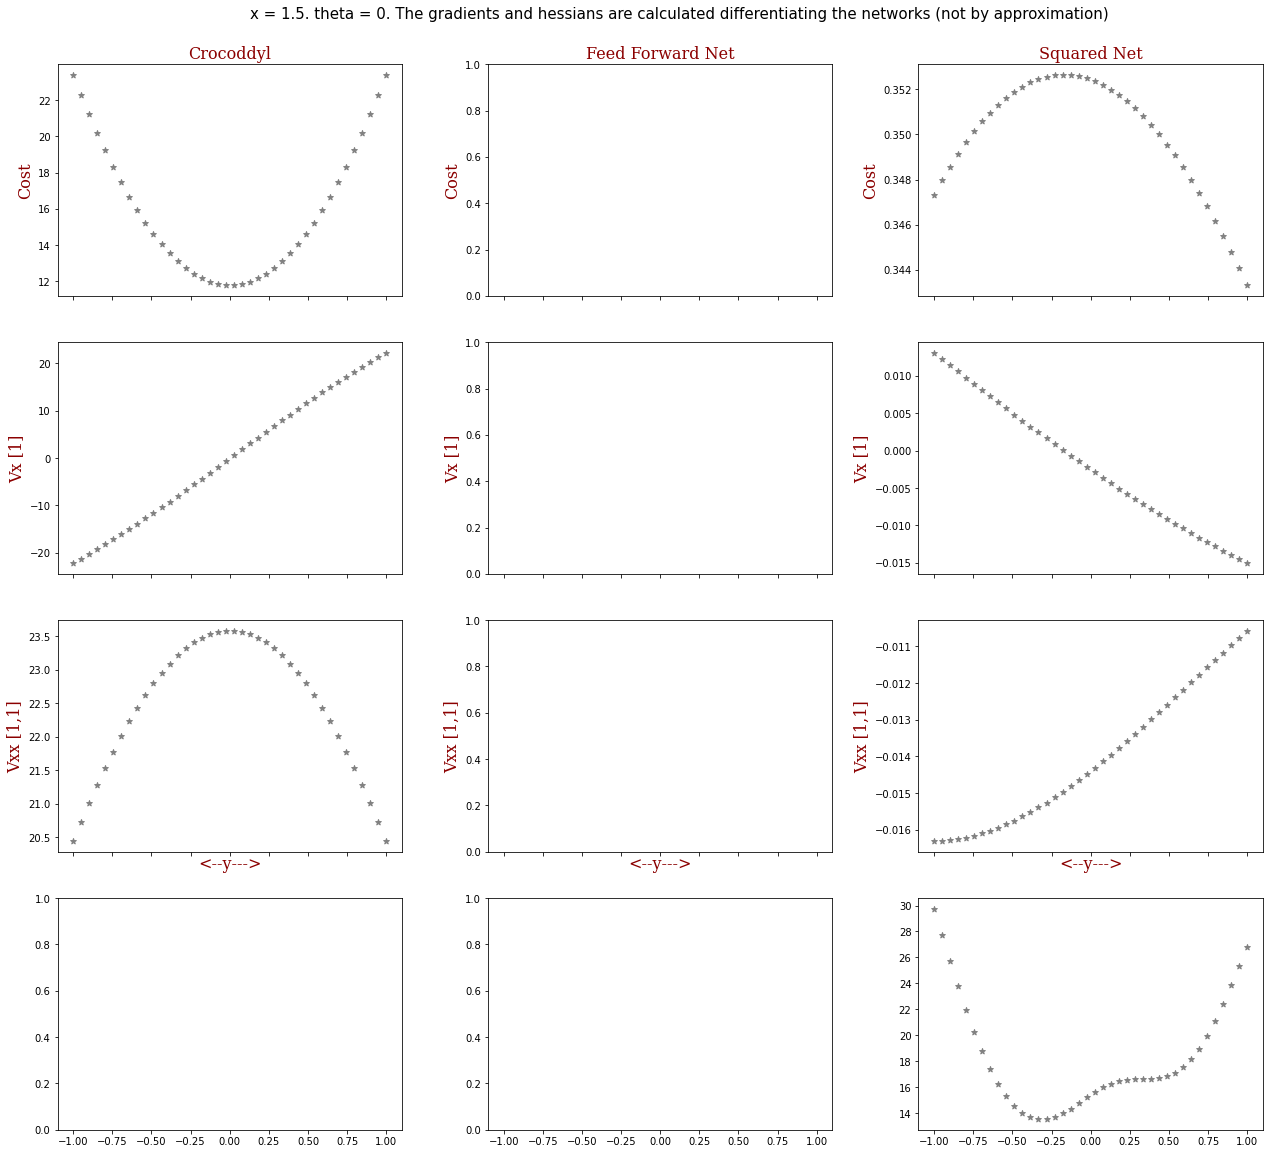

In [22]:
plt.clf()

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

note = "The gradients and hessians are calculated differentiating the networks (not by approximation)"

fig, axs = plt.subplots(4, 3, figsize=(18, 20), sharex=True)
fig.subplots_adjust(left=0.02, bottom=0.2, right=0.95, top=0.94, wspace=0.25)
fig.suptitle(f'x = {x}. theta = 0. {note}', fontsize = 15)

im1 = axs[0, 0].scatter(xtest[:,1], cost_crocoddyl, c = 'grey', marker = "*")
#im2 = axs[0, 1].scatter(xtest[:,1], cost_ffn, c = 'grey', marker = "*")
im3 = axs[0, 2].scatter(xtest[:,1], cost_sqn, c = 'grey', marker = "*")
im4 = axs[1, 0].scatter(xtest[:,1], vx1, c = 'grey', marker = "*")
#im5 = axs[1, 1].scatter(xtest[:,1], ffn_vx1, c = 'grey', marker = "*")
im6 = axs[1, 2].scatter(xtest[:,1], sqn_vx1, c = 'grey', marker = "*")
im7 = axs[2, 0].scatter(xtest[:,1], vxx11, c = 'grey', marker = "*")
#im8 = axs[2, 1].scatter(xtest[:,1], ffn_vxx11, c = 'grey', marker = "*")
im9 = axs[2, 2].scatter(xtest[:,1], sqn_vxx11, c = 'grey', marker = "*")

#im10 = axs[3, 1].scatter(xtest[:,1], ffn_vxx11_a, c = 'grey', marker = "*")
im11 = axs[3, 2].scatter(xtest[:,1], sqn_vxx11_a, c = 'grey', marker = "*")




axs[0, 1].set_title("Feed Forward Net", fontdict=font)
axs[0, 1].set_ylabel("Cost", fontdict = font)
axs[0, 2].set_title("Squared Net", fontdict=font)
axs[0,2].set_ylabel("Cost", fontdict = font)
axs[1,2].set_ylabel("Vx [1]", fontdict = font)
axs[0, 0].set_title("Crocoddyl", fontdict=font)
axs[2,2].set_ylabel("Vxx [1,1]", fontdict = font)
axs[2, 0].set_xlabel("<--y--->", fontdict = font)
axs[2, 1].set_xlabel("<--y--->", fontdict = font)
axs[2, 2].set_xlabel("<--y--->", fontdict = font)
axs[2,1].set_ylabel("Vxx [1,1]", fontdict = font)
axs[2,0].set_ylabel("Vxx [1,1]", fontdict = font)
axs[1,1].set_ylabel("Vx [1]", fontdict = font)
axs[1,0].set_ylabel("Vx [1]", fontdict = font)
axs[0,0].set_ylabel("Cost", fontdict = font)


